# Visualization of the locations of all ships

In [8]:
import matplotlib.pyplot as plt
import numpy as np

from Utilities import *

import os
import pandas

Pandas csv reading was running for 6.654349 s
The dataset contains 262,060 training images.
The dataset contains 201,386 test images.


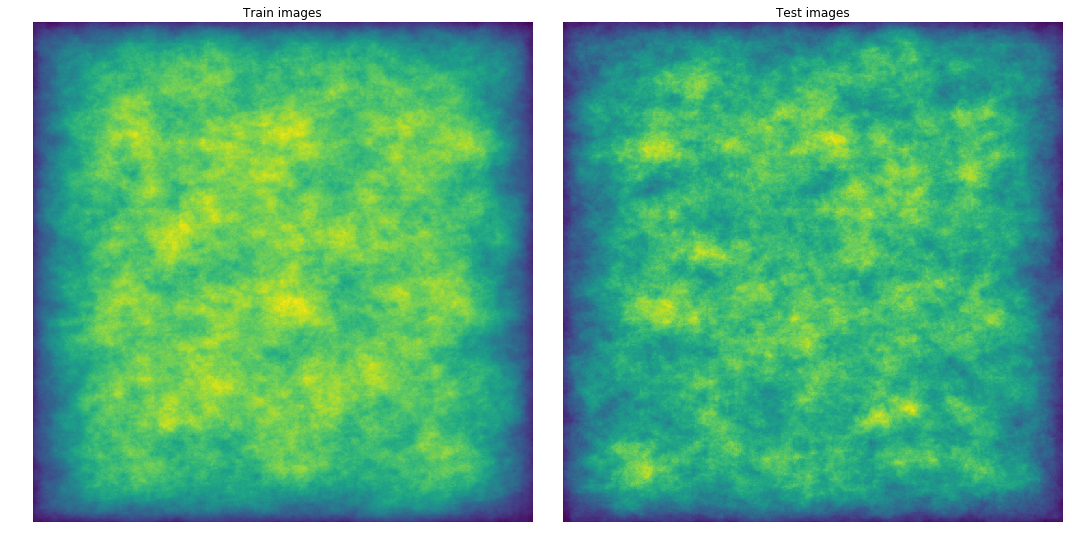

In [9]:
DATASET_FOLDER = "data"
TRAINING_ANNOTATION_FILE = os.path.join(DATASET_FOLDER, "train_ship_segmentations.csv")
TEST_ANNOTATION_FILE = os.path.join(DATASET_FOLDER, "test_ship_segmentations.csv")

with ElapsedTime("Pandas csv reading"):
    training_data = pandas.read_csv(TRAINING_ANNOTATION_FILE)
    test_data = pandas.read_csv(TEST_ANNOTATION_FILE)
nLabeledTrainExamples = training_data.size
nLabeledTestExamples = test_data.size
print("The dataset contains {:,d} training images.".format(nLabeledTrainExamples))
print("The dataset contains {:,d} test images.".format(nLabeledTestExamples))

#Removing rows, where no masks are present; getting the pixel information
train_masks = training_data.dropna()
test_masks = test_data.dropna()
train_img_masks = train_masks['EncodedPixels'].tolist()
test_img_masks = test_masks['EncodedPixels'].tolist()

#At every pixel, for every mask, if there is a ship segmentation part, we add one to all_masks
#Storing the number of ship occurances at every pixel this way
all_masks_train = np.zeros((768, 768))
for mask in train_img_masks:
    all_masks_train += annotation2Mask(mask)
    
all_masks_test = np.zeros((768, 768))
for mask in test_img_masks:
    all_masks_test += annotation2Mask(mask)

#We scale the matrix down to fit into the 0-255 range, 255 representing the pixels, at which on every image there is a ship
#In this way we can represent the occurances in a greyscale image
all_masks_train /= nLabeledTrainExamples
all_masks_train *= 255

all_masks_test /= nLabeledTestExamples
all_masks_test *= 255

#PLotting occurance image
fig, axarr = plt.subplots(1, 2, figsize=(15, 40))
axarr[0].axis('off')
axarr[1].axis('off')
axarr[0].set_title('Train images')
axarr[1].set_title('Test images')
axarr[0].imshow(all_masks_train)
axarr[1].imshow(all_masks_test)
plt.tight_layout(h_pad=0.1, w_pad=0.1)
plt.show()